## EDA

Import labray

In [ ]:
import pandas as pd
import numpy as np 
import pickle
import matplotlib.pyplot as plt

## load Data

In [ ]:
#pd.read_csv('/content/fake_job_postings.csv')
df=pd.read_csv("Data.csv")
df.head(5)

,job_id,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,text
0,1,0,0,1,0,Other,Internship,NaN,Marketing,0,marketing intern were food weve created ground...
1,2,0,0,1,0,Full-time,Not Applicable,NaN,Customer Service,0,customer service cloud video production second...
2,3,0,0,1,0,NaN,NaN,NaN,NaN,0,commissioning machinery assistant cma valor se...
3,4,0,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0,account executive washington dc passion improv...
4,5,0,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0,bill review manager spotsource solution llc gl...


In [ ]:
df.tail()

,job_id,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,text
17875,17876,0,0,1,1,Full-time,Mid-Senior level,NaN,Sales,0,account director distribution vend looking awe...
17876,17877,0,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Accounting/Auditing,0,payroll accountant weblinc ecommerce platform ...
17877,17878,0,0,0,0,Full-time,NaN,NaN,NaN,0,project cost control staff engineer cost contr...
17878,17879,0,0,0,1,Contract,Not Applicable,Professional,Design,0,graphic designer nemsia studio looking experie...
17879,17880,0,0,1,1,Full-time,Mid-Senior level,NaN,Engineering,0,web application developer vend looking awesome...


In [ ]:
realcount = (df['fraudulent']==0).sum() #Number of real applications
fakecount = (df['fraudulent']==1).sum() #Number of fake applications


# FUNCTION TO CALCULATE THE NUMBER OF NOT SPECIFIED ENTRIES IN VARIOUS ATTRIBUTES ALONG WITH THE RATIO OF NOT SPECIFIED TO REAL AND FAKE APPLICATIONS

def not_specified(labelname,name):   
    df_real = pd.DataFrame(df[labelname].loc[df['fraudulent']==0])
    notspecreal = (df_real[labelname]=='Not Specified').sum()
    print(name +'\n-----------------\n\nREAL\n-----------\nNumber of Real applications that have not specified ' + name + ' = {:.0f}'.format(notspecreal))
    print('Number of Real applications = {:.0f}'.format(realcount))
    print('Ratio (Not Specified Real applications / Real applications) = {:.6f}'.format(notspecreal/realcount))
    df_fake = pd.DataFrame(df[labelname].loc[df['fraudulent']==1])
    notspecfake = (df_fake[labelname]=='Not Specified').sum()
    print('\n\nFAKE\n-----------\nNumber of Fake applications that have not specified ' + name + ' = {:.0f}'.format(notspecfake))
    print('Number of Fake applications = {:.0f}'.format(fakecount))
    print('Ratio (Not Specified Fake applications / Fake applications) = {:.6f}'.format(notspecfake/fakecount))

for i in df.columns:
    not_specified(i,i.upper())
    print('\n')


JOB_ID
-----------------

REAL
-----------
Number of Real applications that have not specified JOB_ID = 0
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.000000


FAKE
-----------
Number of Fake applications that have not specified JOB_ID = 0
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.000000


SALARY_RANGE
-----------------

REAL
-----------
Number of Real applications that have not specified SALARY_RANGE = 0
Number of Real applications = 17014
Ratio (Not Specified Real applications / Real applications) = 0.000000


FAKE
-----------
Number of Fake applications that have not specified SALARY_RANGE = 0
Number of Fake applications = 866
Ratio (Not Specified Fake applications / Fake applications) = 0.000000


TELECOMMUTING
-----------------

REAL
-----------
Number of Real applications that have not specified TELECOMMUTING = 0
Number of Real applications = 17014
Ratio (Not Specified R

In [ ]:
#https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df

,column_name,percent_missing
job_id,job_id,0.000000
salary_range,salary_range,0.000000
telecommuting,telecommuting,0.000000
has_company_logo,has_company_logo,0.000000
has_questions,has_questions,0.000000
employment_type,employment_type,19.412752
required_experience,required_experience,39.429530
required_education,required_education,45.329978
function,function,36.101790
fraudulent,fraudulent,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


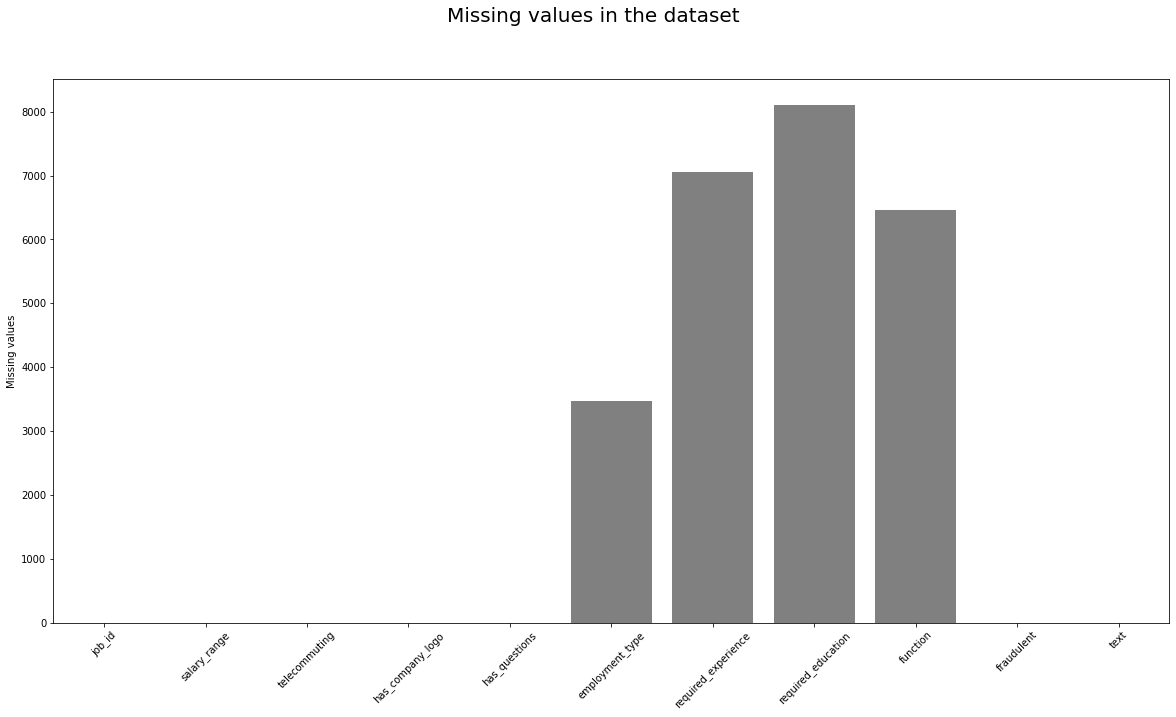

In [ ]:
null_values = df.isnull().sum()
plt.figure(figsize = (20,10))
sns.barplot(null_values.index, null_values, color = 'grey')
plt.suptitle('Missing values in the dataset', size = 20)
plt.ylabel('Missing values')
plt.xticks(rotation = '45')
plt.show()

In [ ]:
categorical_columns = []
for col in df.columns:
    print(f'Unique rows in {col}:', df[col].nunique())
    if df[col].nunique() < 15:
        categorical_columns.append(col)
print('Categorical columns:',categorical_columns)

Unique rows in job_id: 17880
Unique rows in salary_range: 196
Unique rows in telecommuting: 2
Unique rows in has_company_logo: 2
Unique rows in has_questions: 2
Unique rows in employment_type: 5
Unique rows in required_experience: 7
Unique rows in required_education: 13
Unique rows in function: 37
Unique rows in fraudulent: 2
Unique rows in text: 15703
Categorical columns: ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent']


In [ ]:
for col in list(set(df.columns) - set(categorical_columns)):
    if df[col].dtypes == 'object':
        df[col] = df[col].fillna('')
print(df.isnull().sum())

job_id                    0
salary_range              0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
function                  0
fraudulent                0
text                      0
dtype: int64


#####**Next, we'll replace the missing values in the categorical columns by setting them as unavailable**

In [ ]:
df['employment_type'] = df['employment_type'].fillna('Employement_Unavailable')
df['required_experience'] = df['required_experience'].fillna('Experience_Unavailable')
df['required_education'] = df['required_education'].fillna('Education_Unavailable')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

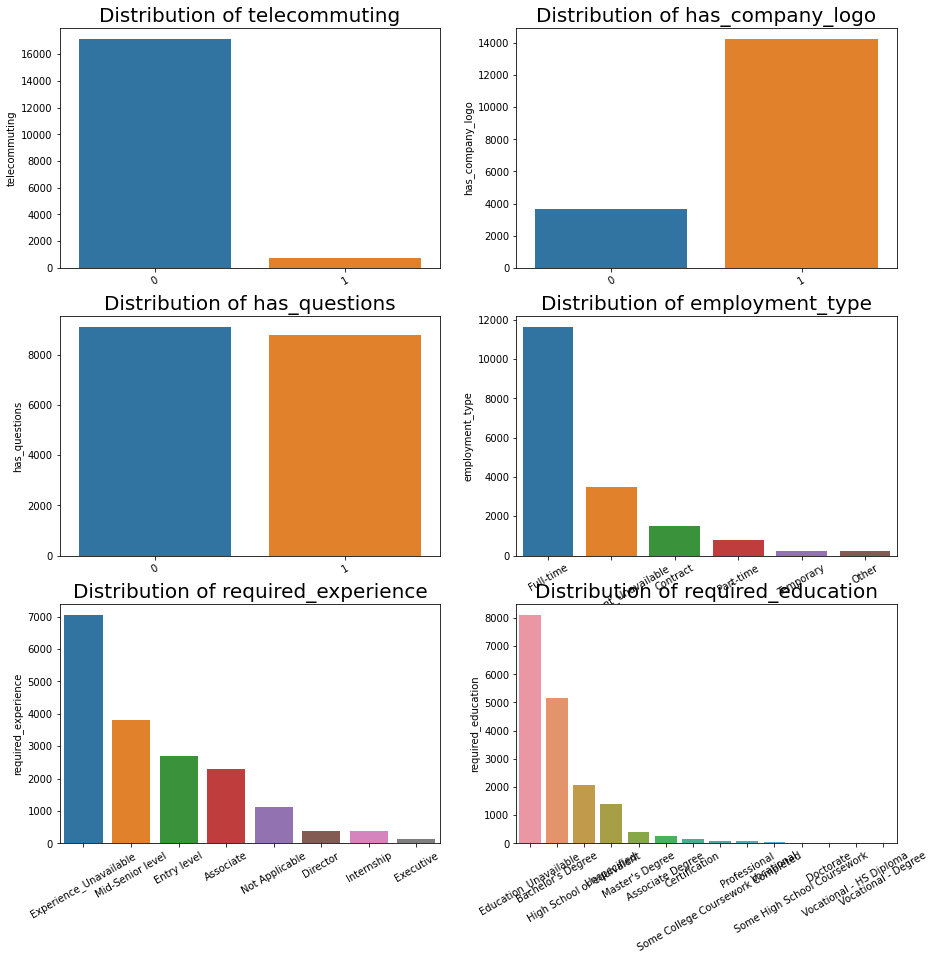

In [ ]:
fig, axs = plt.subplots(len(categorical_columns)//2 , 2, figsize = (15,15))
plt_row = 0
plt_col = 0
for i, col in enumerate(categorical_columns):
    if col == 'fraudulent':
        continue
    _ = df[col].value_counts()
    sns.barplot(_.index, _, ax = axs[plt_row][plt_col])
    axs[plt_row][plt_col].set_title(f'Distribution of {col}', size = 20)
    for tick in axs[plt_row,plt_col].get_xticklabels():
        tick.set_rotation(30)
    if plt_col == 0:
        plt_col = 1
    else:
        plt_col = 0
        plt_row += 1
plt.show()

In [ ]:
df.describe()

,job_id,salary_range,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,1.788000e+04,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,4.719018e+04,0.042897,0.795302,0.491723,0.048434
std,5161.655742,3.744941e+06,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000e+00,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000e+00,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000e+00,0.000000,1.000000,1.000000,0.000000
max,17880.000000,4.000000e+08,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(df["salary_range"].max())
print(df["salary_range"].min())

400000000
0


In [ ]:
non_zero_salary =df[df['salary_range']!=0]
non_zero_salary

,job_id,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,text
6,7,8000,0,1,1,Full-time,Mid-Senior level,Master's Degree,Management,0,head content m f founded fonpit ag rose intern...
10,11,20000,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology,0,asp net developer job opportunity united state...
15,16,30000,0,1,1,Full-time,Executive,Bachelor's Degree,Sales,0,vp sale vault dragon jungle venture leading si...
23,24,20000,0,1,0,Full-time,Executive,Unspecified,Sales,0,vice president sale sponsorship businessfriend...
31,32,15000,0,1,0,Full-time,Associate,Unspecified,Engineering,0,software application specialist day dayinstall...
...,...,...,...,...,...,...,...,...,...,...,...
17843,17844,20000,0,1,0,Full-time,Experience_Unavailable,Education_Unavailable,Design,0,interior designer position available client ho...
17849,17850,20000,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Design,0,communication designer balanced lab exists pro...
17865,17866,2000,0,1,1,Full-time,Entry level,Bachelor's Degree,Sales,0,portfolio development associate paris rest fra...
17867,17868,1000,0,1,0,Full-time,Entry level,Unspecified,Sales,0,admin assistant seeking administrator work bus...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


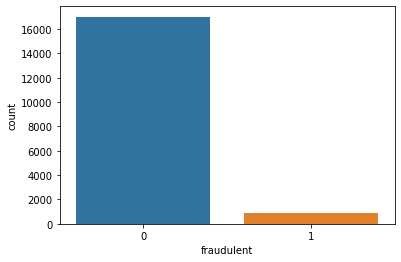

In [ ]:
sns.countplot(df['fraudulent'])

In [ ]:
df['fraudulent'].describe()

count    17880.000000
mean         0.048434
std          0.214688
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: fraudulent, dtype: float64

In [ ]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

######fraudulent has 17014 not fraudulent and 866 is fraudulent

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


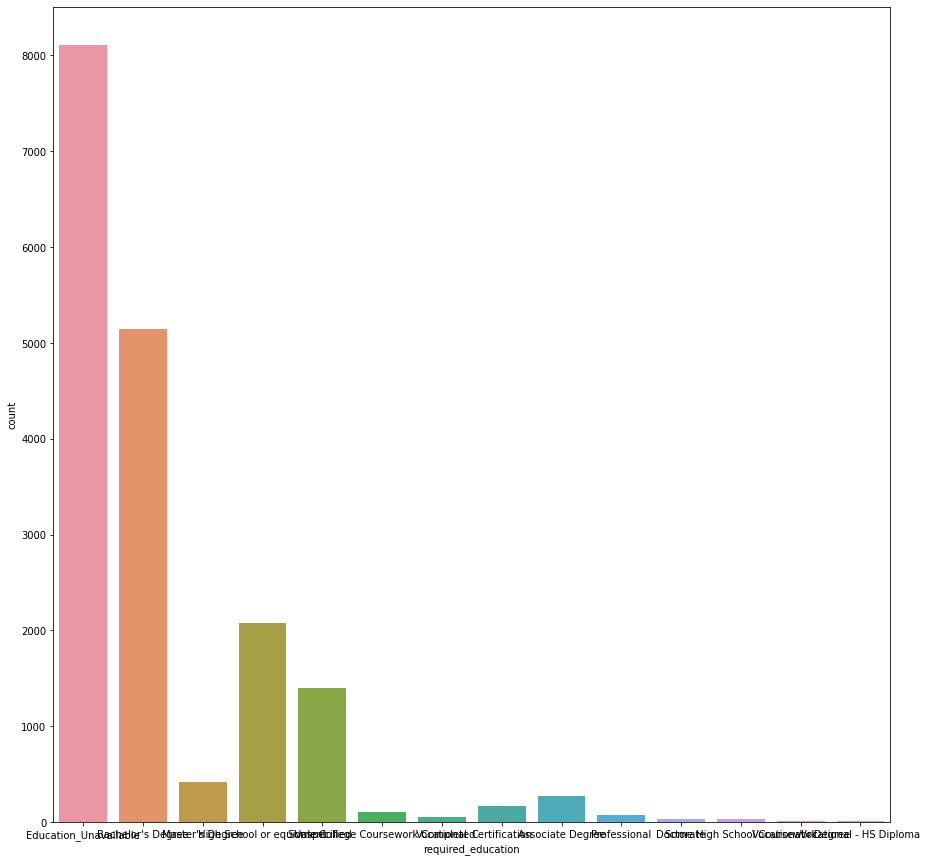

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(df['required_education'])

**Relation between required_education and fraudulent**

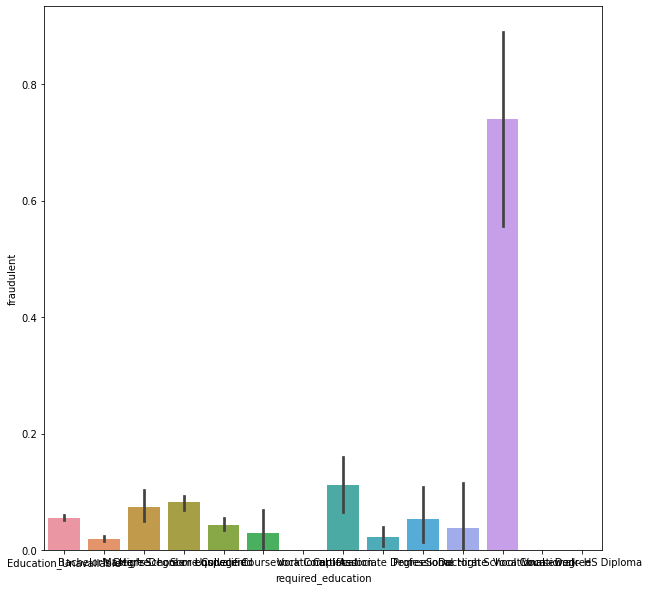

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, x='required_education', y='fraudulent')

In [ ]:
'''
plt.figure(figsize=(15,10))
sns.scatterplot(df.salary_range,df.fraudulent)
plt.ioff()
'''

'\nplt.figure(figsize=(15,10))\nsns.scatterplot(df.salary_range,df.fraudulent)\nplt.ioff()\n'

#### Find outliers using IQR

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


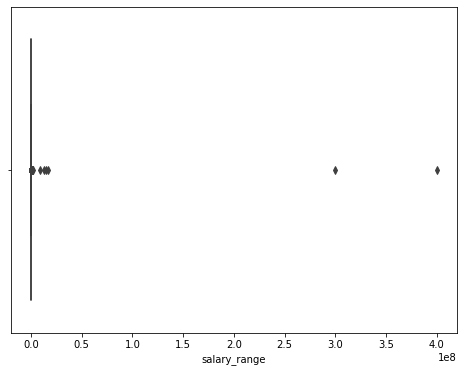

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(df['salary_range'])

In [ ]:
Q1 = np.percentile(non_zero_salary['salary_range'] , 25) 
Q3 = np.percentile(non_zero_salary['salary_range'] , 75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [ ]:
outliers = []
for salary in non_zero_salary['salary_range'] :
    if ((salary > up_lim) or (salary < low_lim)):
         outliers.append(salary)

In [ ]:
non_zero_salary = non_zero_salary[~non_zero_salary['salary_range'].isin(outliers)]


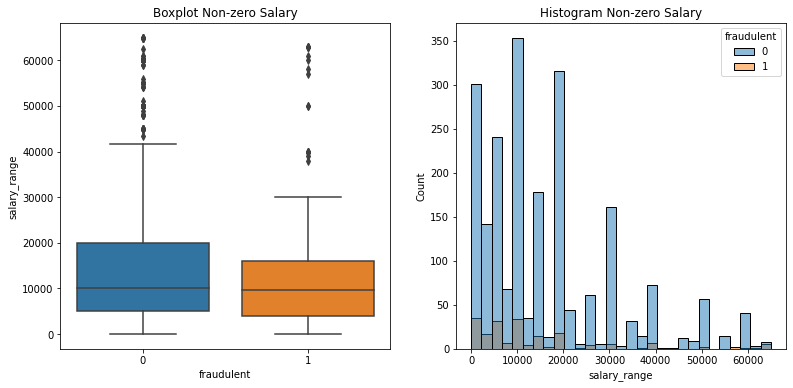

In [ ]:
box_title = 'Boxplot Non-zero Salary'
hist_title = 'Histogram Non-zero Salary'
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

sns.boxplot(x='fraudulent', y='salary_range', data=non_zero_salary, ax=axes[0]).set_title(box_title)
sns.histplot(hue='fraudulent', x='salary_range', data=non_zero_salary, ax=axes[1]).set_title(hist_title)
plt.show()

From the plots, it looks like the salaries are pretty low and right skewed, regardless of fraudulence or not.

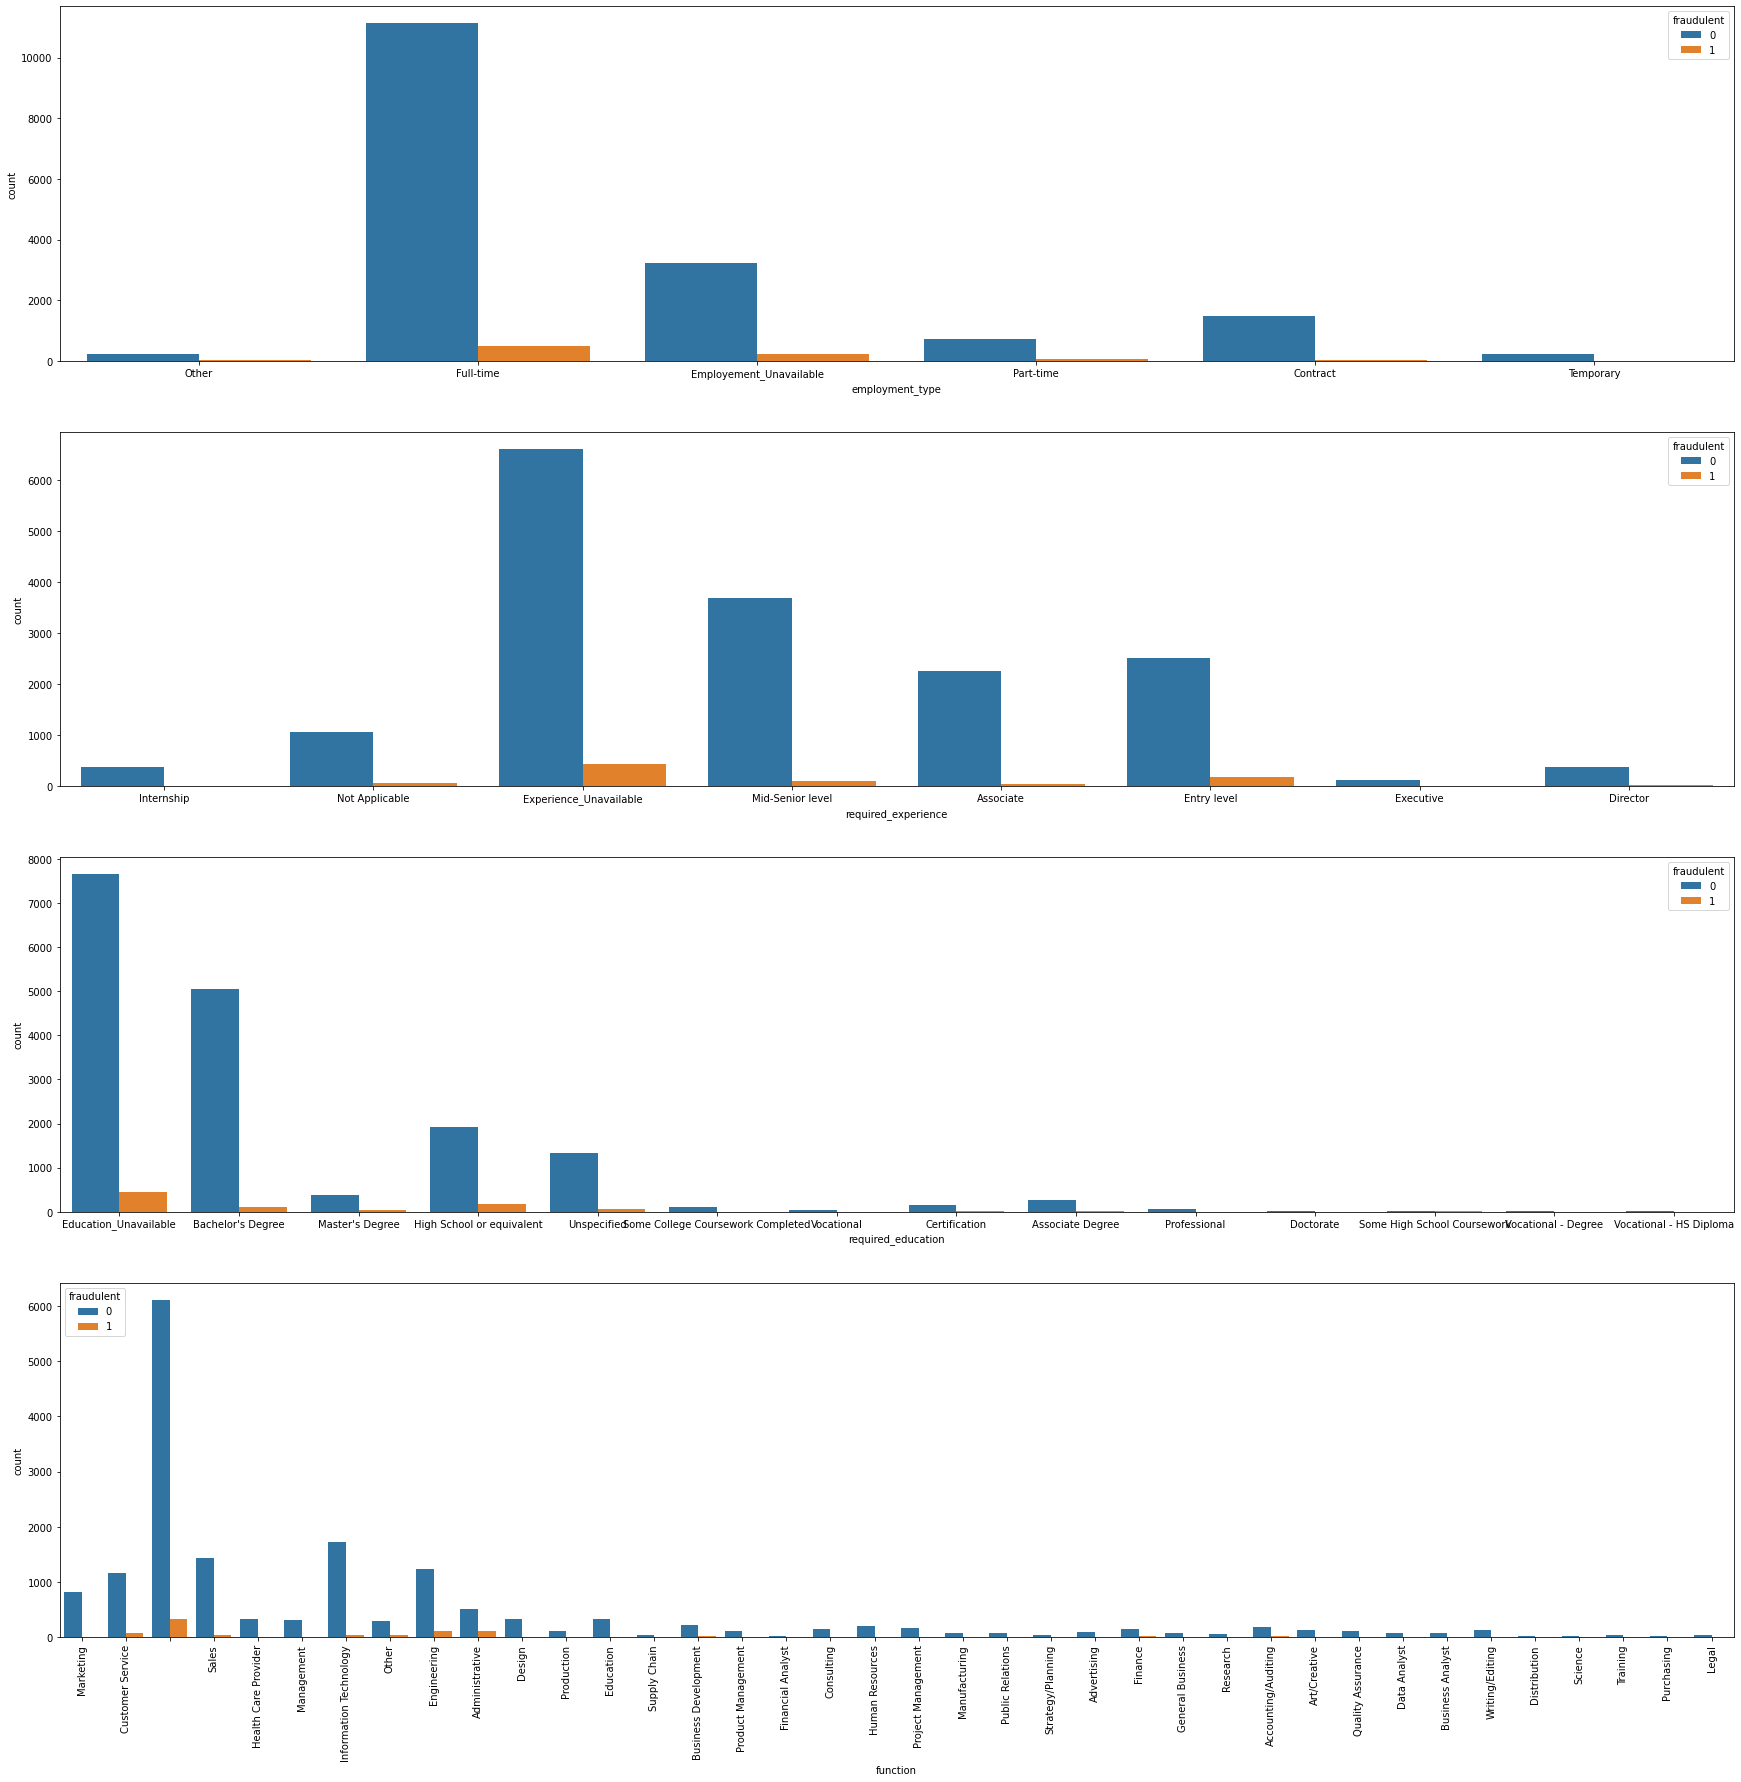

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(30,30))
plt.xticks(rotation=90)
sns.countplot(x="employment_type", hue="fraudulent", data=df, ax=axes[0])
sns.countplot(x="required_experience", hue="fraudulent", data=df, ax=axes[1])
sns.countplot(x="required_education", hue="fraudulent", data=df, ax=axes[2])
sns.countplot(x="function", hue="fraudulent", data=df, ax=axes[3])
plt.show()

# Correlation

The distributions of real and fake jobs are roughly the same for these features. Mostly full time, unspecified or bachelors education, or an Other job fuction

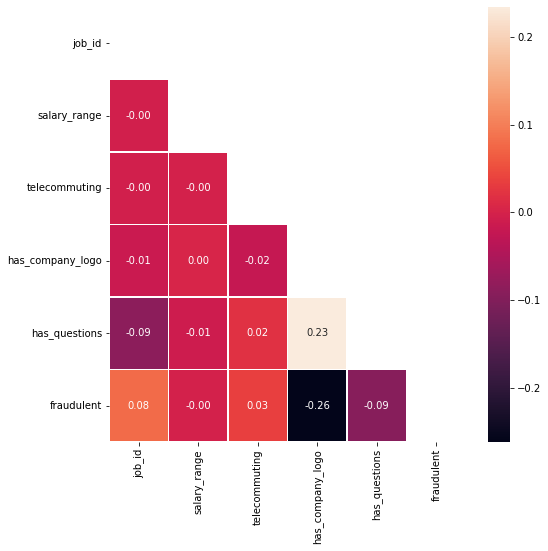

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


In [ ]:
 import seaborn as sns
corr_1 = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
dropSelf = np.zeros_like(corr_1)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr_1, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()


corr = df.corr()

sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


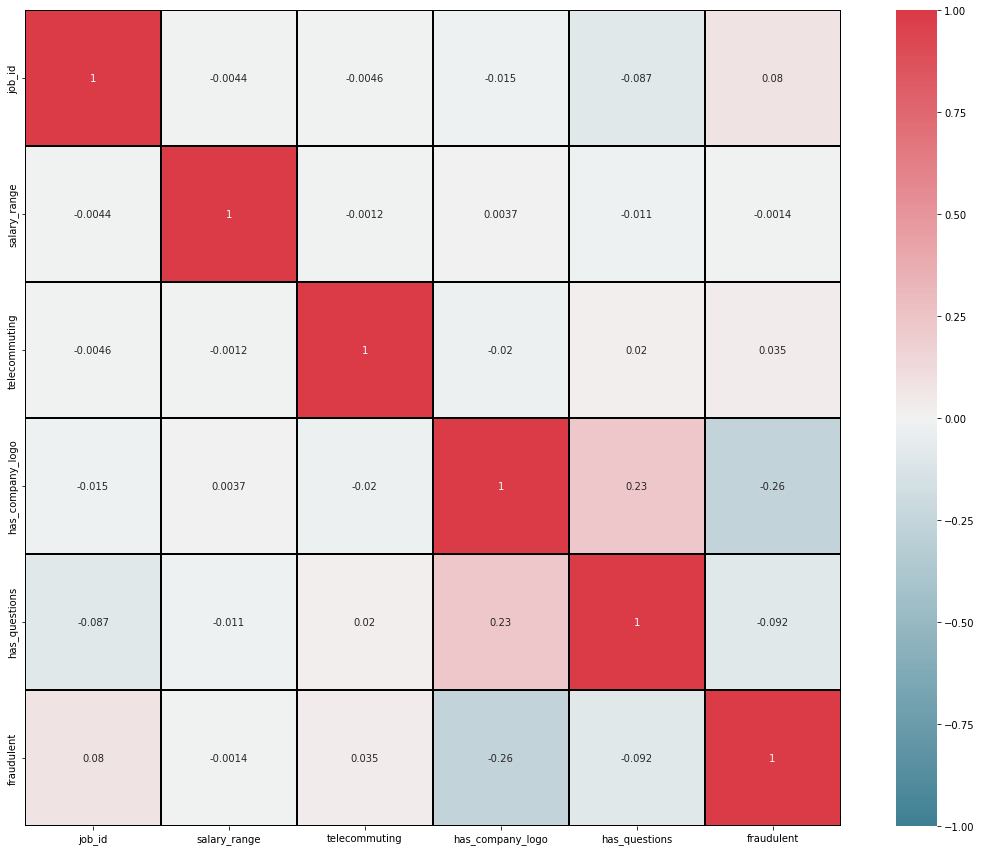

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(20,15))

corr = df.corr()

sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()

In [ ]:
df.corr()

,job_id,salary_range,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004433,-0.004559,-0.014539,-0.087025,0.079872
salary_range,-0.004433,1.000000,-0.001151,0.003717,-0.011246,-0.001399
telecommuting,-0.004559,-0.001151,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,0.003717,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,-0.011246,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,-0.001399,0.034523,-0.261971,-0.091627,1.000000


## conclusion

The dataset that is used in this project is very unbalanced. Most jobs are real, and few are fraudulent. Due to this, real jobs are being identified quite well. Certain techniques, like SMOTE, can be used to generate synthetic minority class samples. A balanced dataset should be able to generate better results.This 
Dataset are not any corr. to each other.
Missing Value Rate is High dropnan is not good for this Dataset.fill the nan values using using frind Percentege nan value of each columns.